In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, norm, uniform, expon

sns.set_style('ticks')

%load_ext autoreload
%autoreload 2

# Завдання
## 1. Для дискретних біномного та пуассонівського законів розподілу виконати наступні дії:
### 1.1 Відтворити розрахунки для біномного закону розподілу і виконати власні для пуассонівського закону розподілу
### 1.2 Перевірити, чи дорівнює одиниці сума імовірностей всіх подій
### 1.3 Для кожного розподілу визначити таке значення випадкової величини $х$, для якого $Р(Х=х)$ максимальна

In [2]:
x = list(range(21))
N = 20

Probability of X falling into interval [4, 9]: 0.704
Sum of all probabilities: 1.0


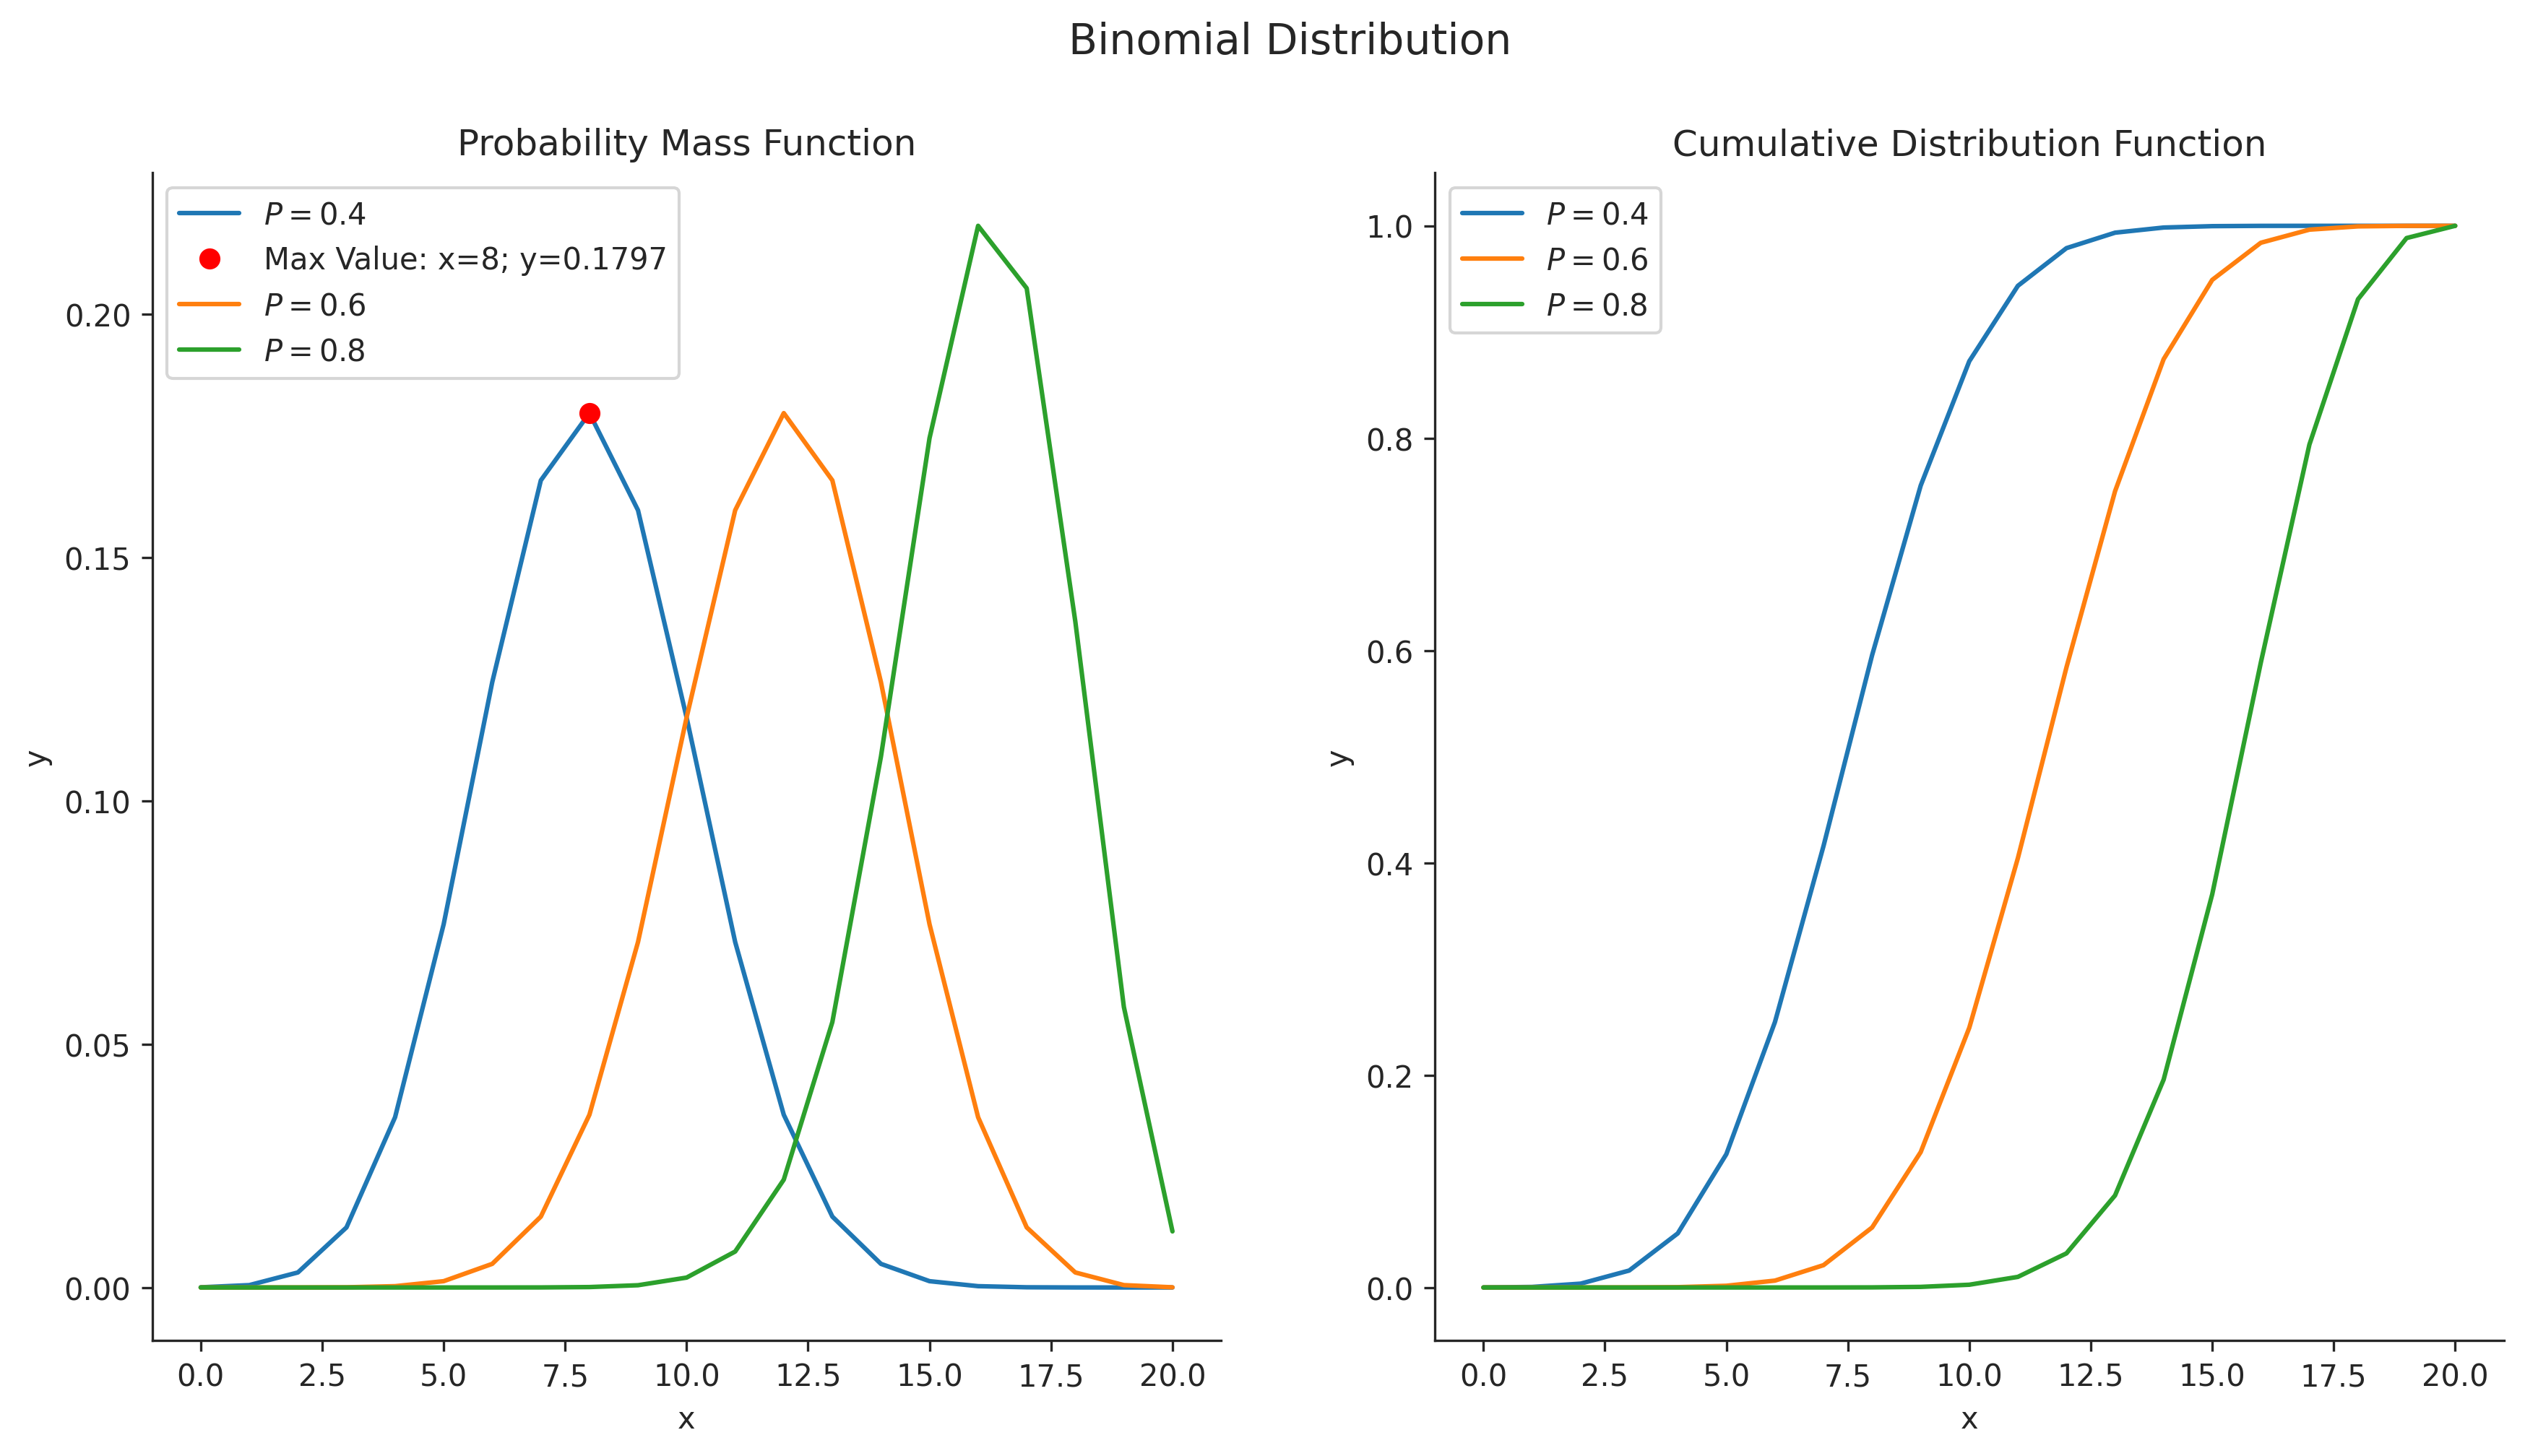

Probability of X falling into interval [4, 9]: 0.617
Sum of all probabilities: 1.0


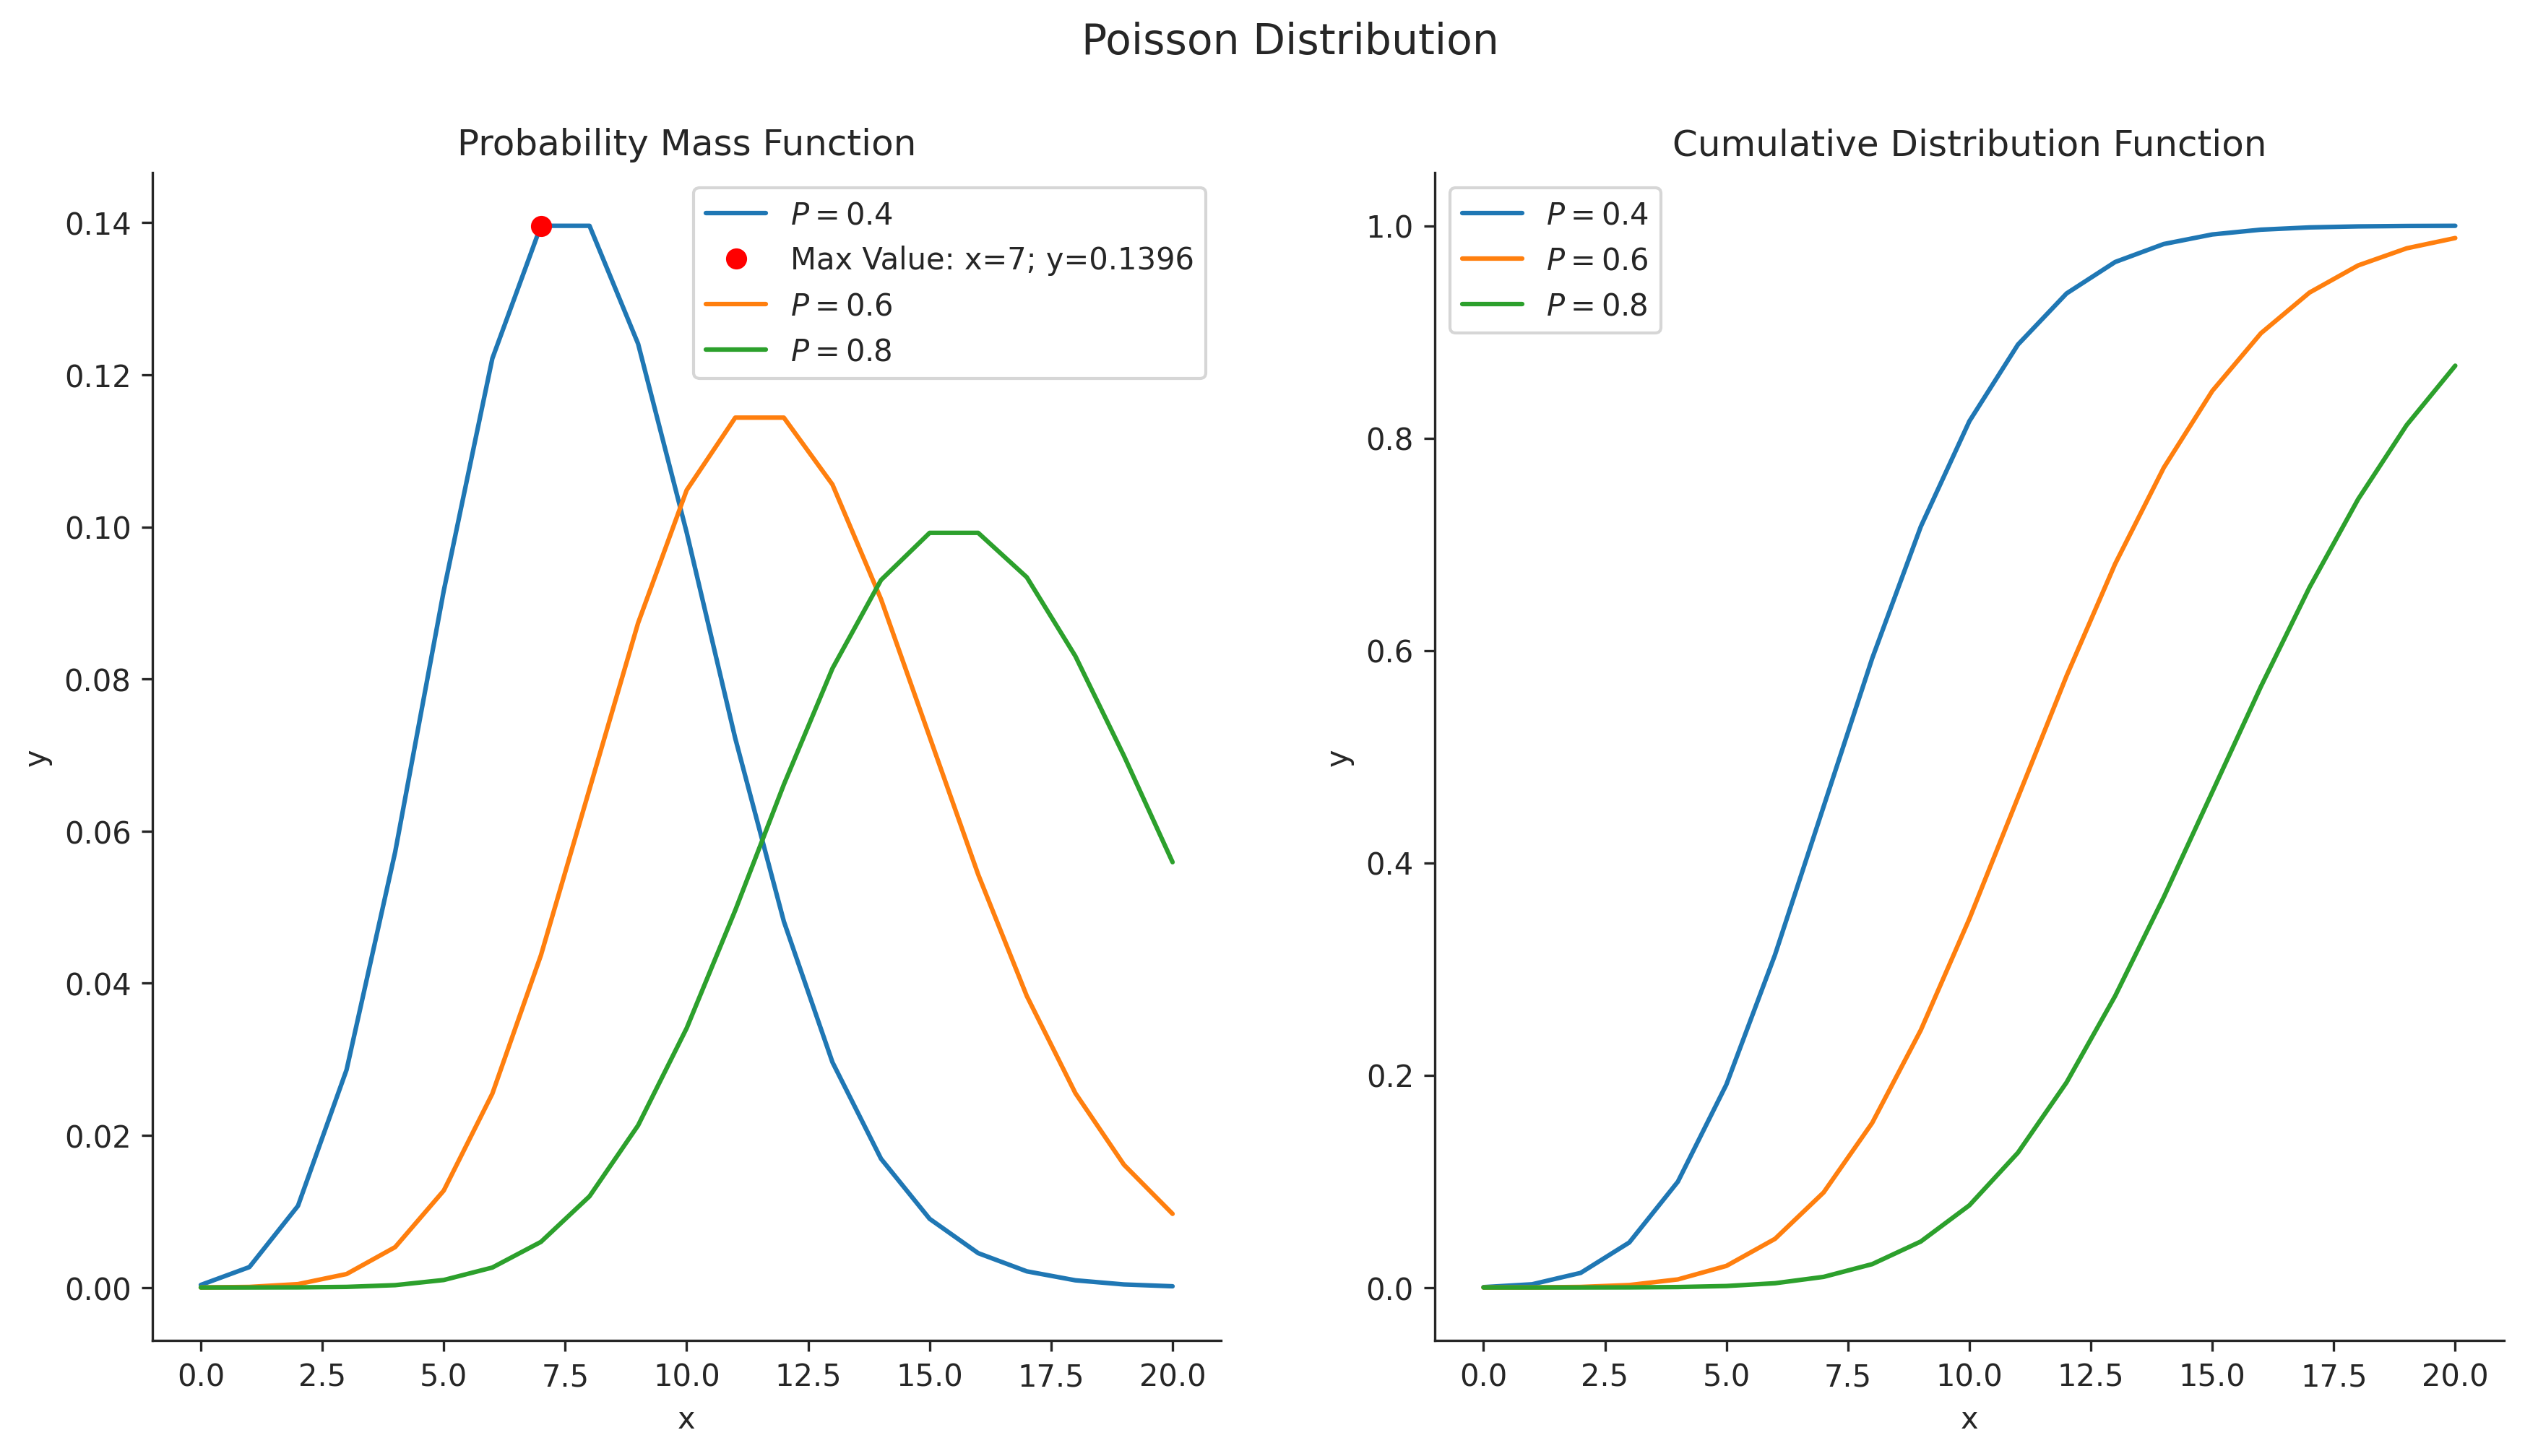

In [3]:
for dist_name in ('Binomial', 'Poisson'):
    # create figure and axes
    fig, (pmf_ax, cdf_ax) = plt.subplots(1, 2, figsize=(14, 7), dpi=300)
    fig.suptitle(f'{dist_name} Distribution', fontsize=14)
    for p in (.4, .6, .8):
        # calculate probability mass function
        if dist_name == 'Binomial':
            y_pmf = binom.pmf(x, N, p)
        else:
            y_pmf = poisson.pmf(x, N * p)
        pmf_ax.plot(x, y_pmf, label=f'$P = {p}$')

        # calculate cumulative distribution function
        if dist_name == 'Binomial':
            y_cdf = binom.cdf(x, N, p)
        else:
            y_cdf = poisson.cdf(x, N * p)
        cdf_ax.plot(x, y_cdf, label=f'$P = {p}$')

        if p == .4:
            print(f'Probability of X falling into interval [4, 9]: {(y_cdf[9] - y_cdf[4]):.3f}')
            print('Sum of all probabilities:', y_pmf.sum().round())
            # calculate a value of X with highest probability
            pmf_imax = y_pmf.argmax()
            x_max, y_pmf_max = x[pmf_imax], y_pmf[pmf_imax]
            pmf_ax.plot(x_max, y_pmf_max, 'ro', label=f'Max Value: x={x_max}; y={y_pmf_max:.4f}')

        # set axis labels
        pmf_ax.set_xlabel('x', fontsize=10)
        pmf_ax.set_ylabel('y', fontsize=10)
        cdf_ax.set_xlabel('x', fontsize=10)
        cdf_ax.set_ylabel('y', fontsize=10)

        # set titles
        pmf_ax.set_title('Probability Mass Function', fontsize=12)
        cdf_ax.set_title('Cumulative Distribution Function', fontsize=12)

        # show legends
        pmf_ax.legend()
        cdf_ax.legend()
    sns.despine()
    plt.show()

Розглянемо графіки та розрахунки для біномного та пуассонівського законів розподілу, при ймовірності успіху в одному досліді $P=0.4$:
- Для обої розподілів, сума імовірностей всіх подій рівна одиниці.
- Для біномного закону розподілу, імовірність потрапляння випадкової величини $X$ у проміжок $[4, 9]$ рівна $0.704$. У випадку пуассонівського закону розподілу, ця імовірність рівна $0.617$.
- Для біномного закону розподілу, максимальна імовірність досягається для числа $8$ і рівна $0.1797$. У випадку пуассонівського закону розподілу, максимальна імовірність досягається для числа $7$ і рівна $0.1396$.

## 2. Для неперервних розподілів дослідити вплив їхніх параметрів на вигляд функції розподілу $F(x)$ та функції щільності розподілу $f(x)$. Побудувати графіки $F(x)$ та $f(x)$ вказаних законів розподілу при наступних співвідношеннях параметрів (мій номер бригади $N_{\text{бр}}=1$).
Я досліджуватиму 3 розподіли на однаковій вибірці зі 100 елементів, рівномірно розподілених на інтервалі $[-5, 5]$
### 2.1 Нормальний розподіл.
- $\mu = N_{\text{бр}}$
    - $\sigma=0.1\mu$
    - $\sigma=\mu$
- $\sigma=1$
    - $\mu = N_{\text{бр}}$
    - $\mu = 2N_{\text{бр}}$

In [4]:
N_group = 1
# create 100 points evenly spaced on the interval [-5, 5]
x = np.linspace(-5, 5, 100)

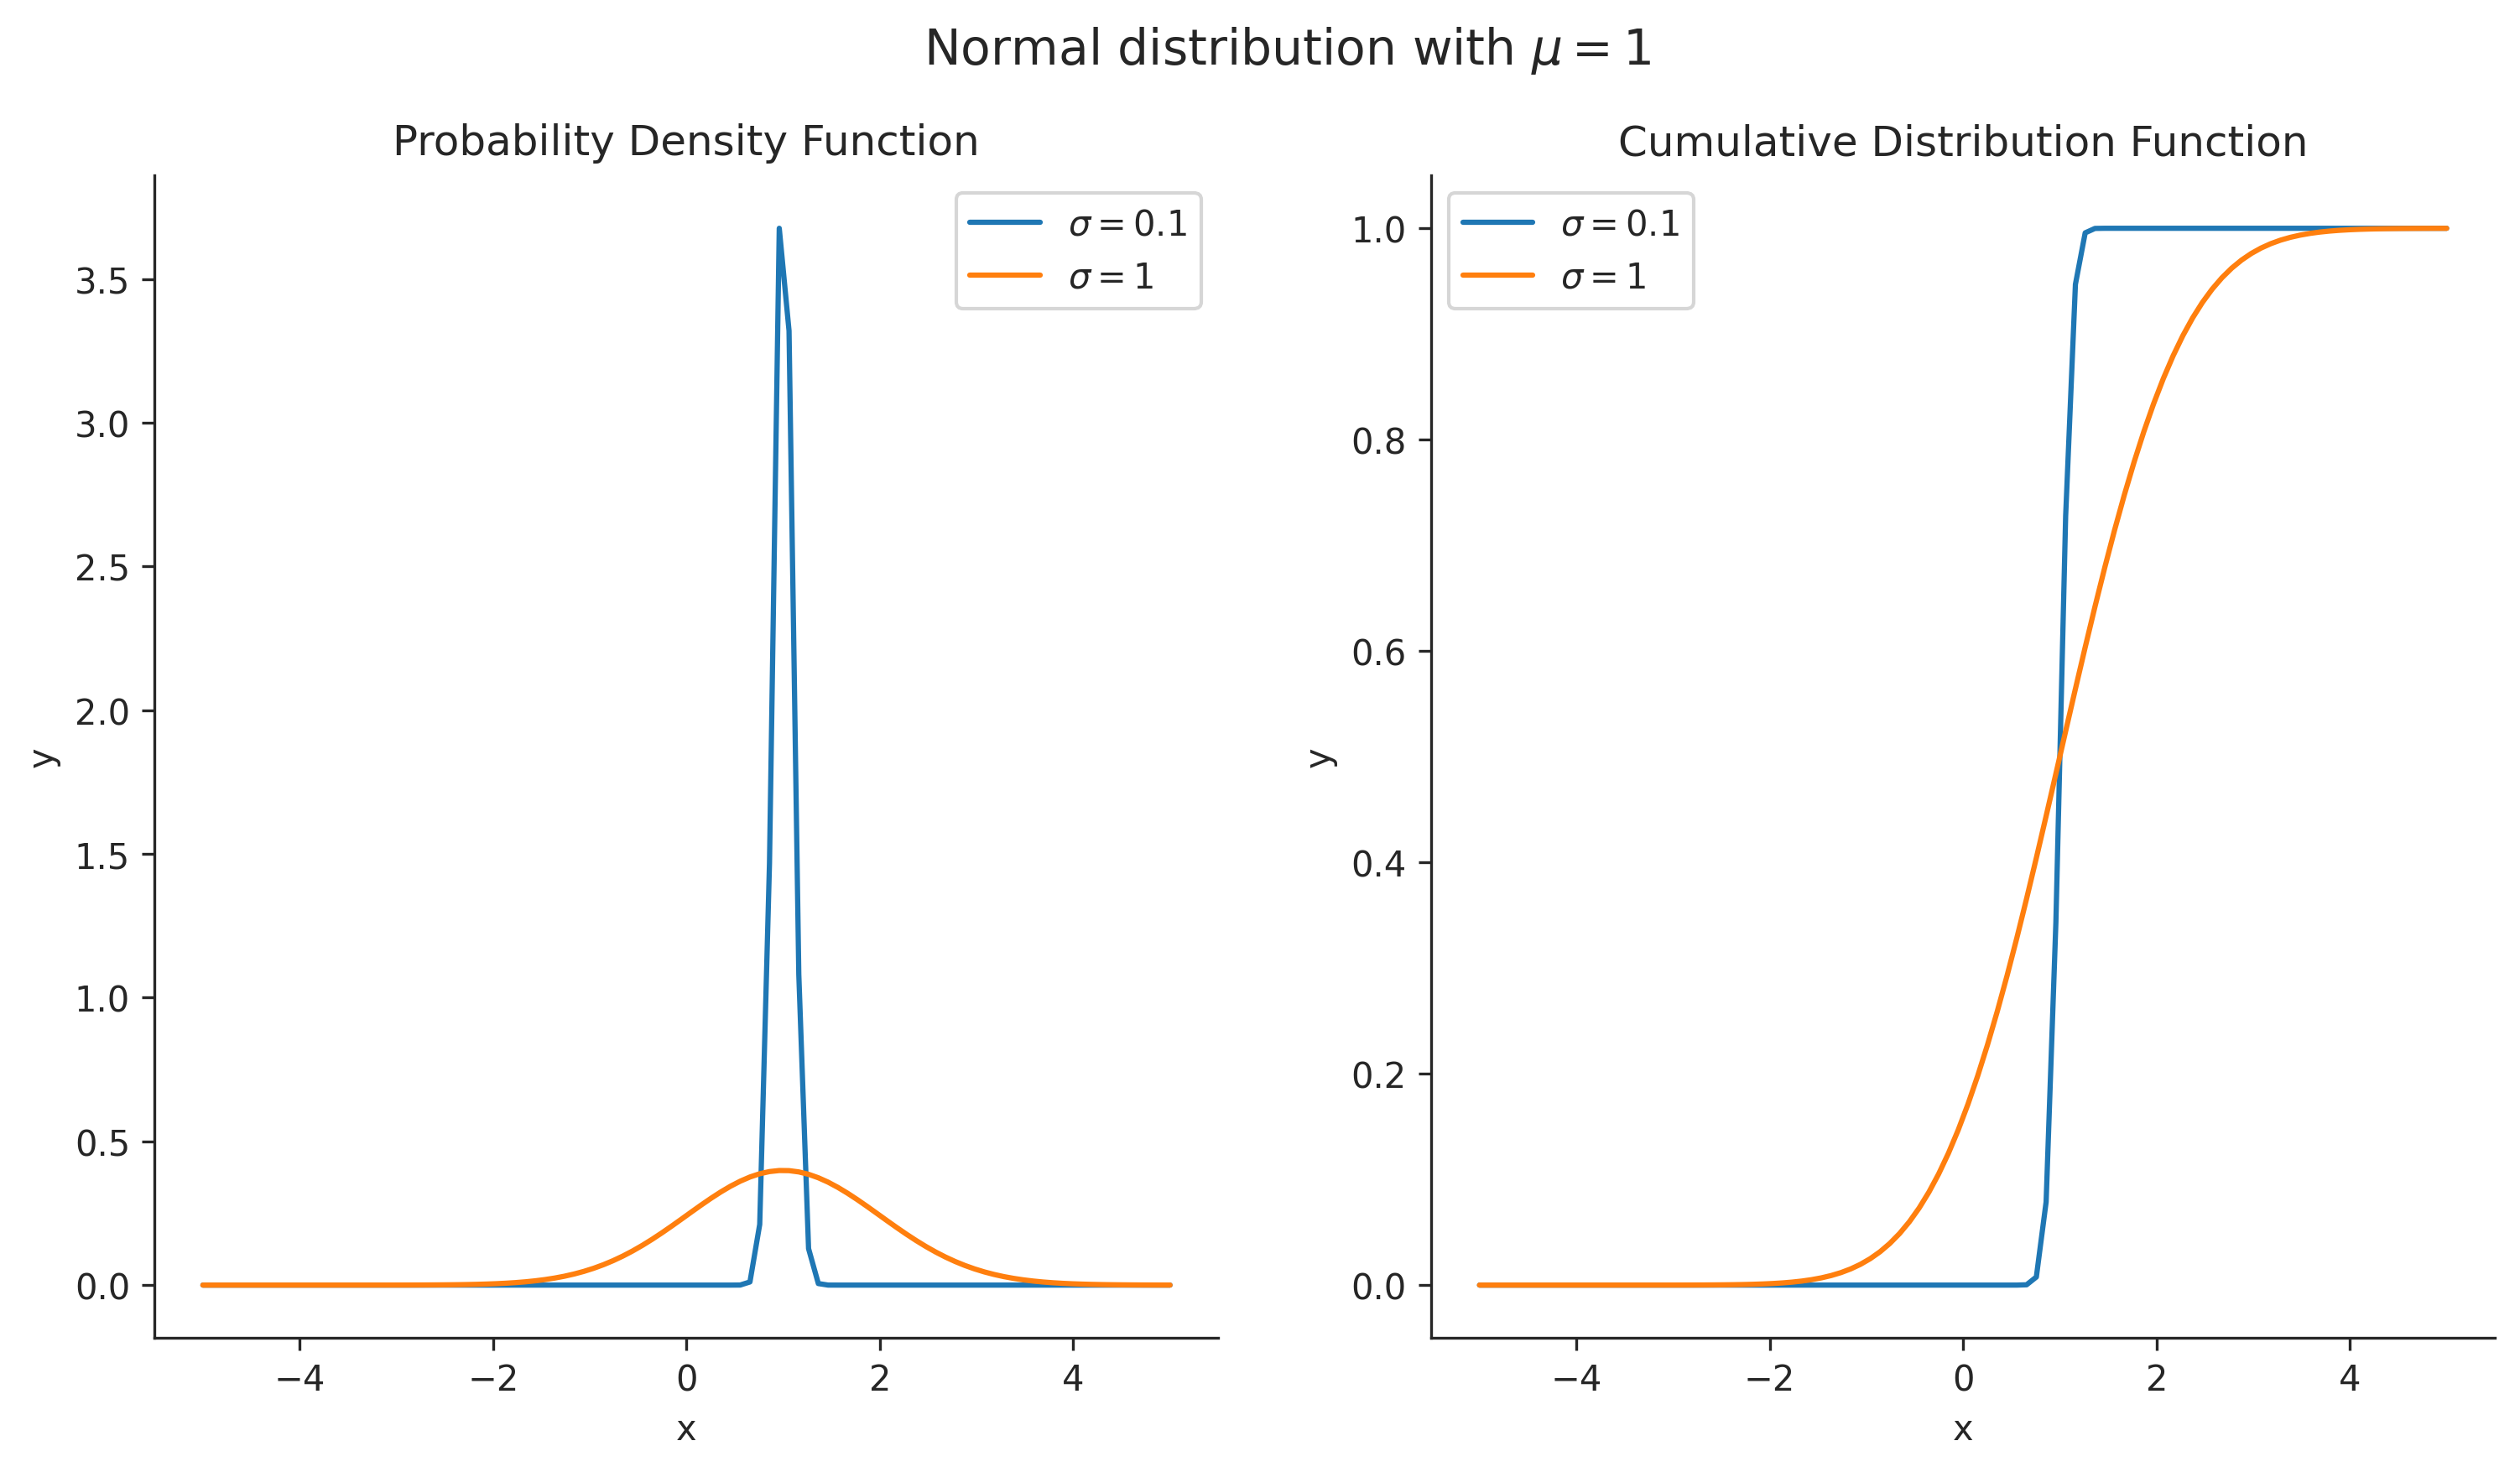

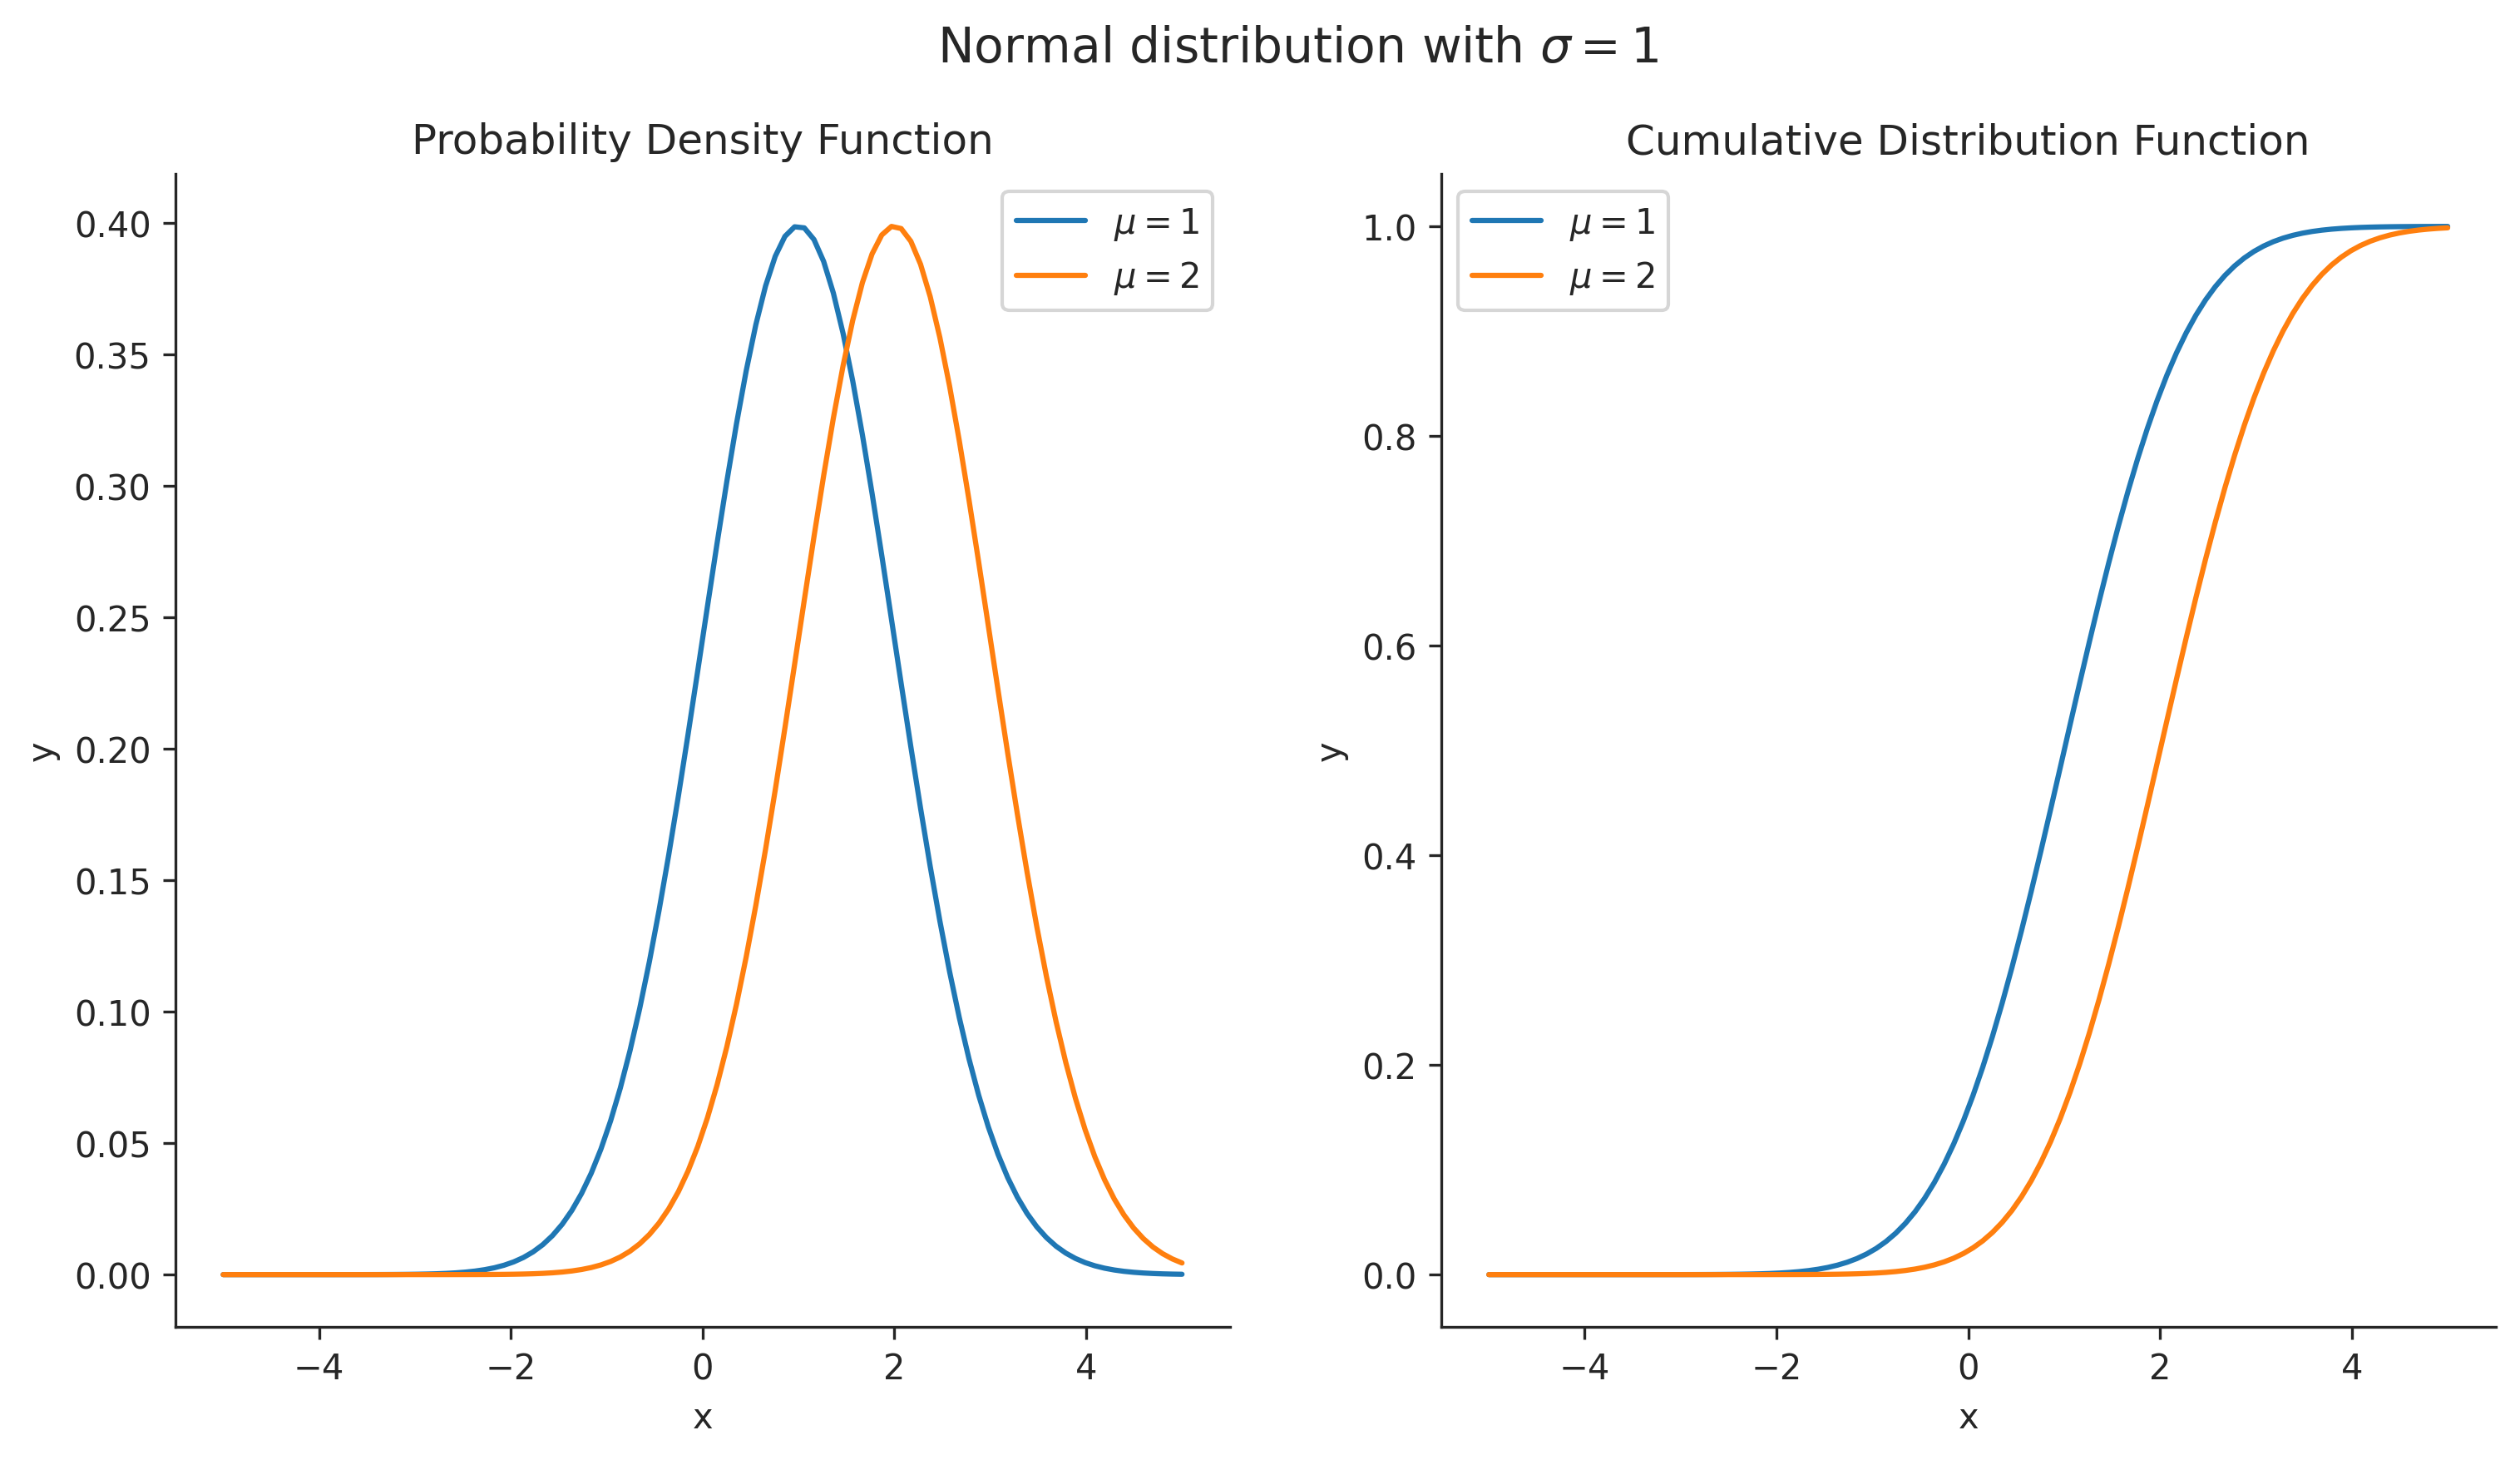

In [5]:
mean = N_group
fig, (pdf_ax, cdf_ax) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
fig.suptitle(f'Normal distribution with $\mu={mean}$', fontsize=14)
for std in (.1 * mean, mean):
    # compute probability density and cumulative distribution functions
    pdf_ax.plot(x, norm.pdf(x, mean, std), label=f'$\sigma={std}$')
    cdf_ax.plot(x, norm.cdf(x, mean, std), label=f'$\sigma={std}$')

    pdf_ax.set_title('Probability Density Function', fontsize=12)
    cdf_ax.set_title('Cumulative Distribution Function', fontsize=12)

    pdf_ax.set_xlabel('x', fontsize=10)
    pdf_ax.set_ylabel('y', fontsize=10)
    cdf_ax.set_xlabel('x', fontsize=10)
    cdf_ax.set_ylabel('y', fontsize=10)

    pdf_ax.legend()
    cdf_ax.legend()
sns.despine()
plt.show()

std = 1
fig, (pdf_ax, cdf_ax) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
fig.suptitle(f'Normal distribution with $\sigma={std}$', fontsize=14)
for mean in (N_group, 2 * N_group):
    pdf_ax.plot(x, norm.pdf(x, mean, std), label=f'$\mu={mean}$')
    cdf_ax.plot(x, norm.cdf(x, mean, std), label=f'$\mu={mean}$')

    pdf_ax.set_title('Probability Density Function', fontsize=12)
    cdf_ax.set_title('Cumulative Distribution Function', fontsize=12)

    pdf_ax.set_xlabel('x', fontsize=10)
    pdf_ax.set_ylabel('y', fontsize=10)
    cdf_ax.set_xlabel('x', fontsize=10)
    cdf_ax.set_ylabel('y', fontsize=10)

    pdf_ax.legend()
    cdf_ax.legend()
sns.despine()
plt.show()  

### 2.2 Рівномірний розподіл
- $a=-N_{\text{бр}}$ ; $b=2N_{\text{бр}}$
- $a=N_{\text{бр}}$ ; $b=4N_{\text{бр}}$

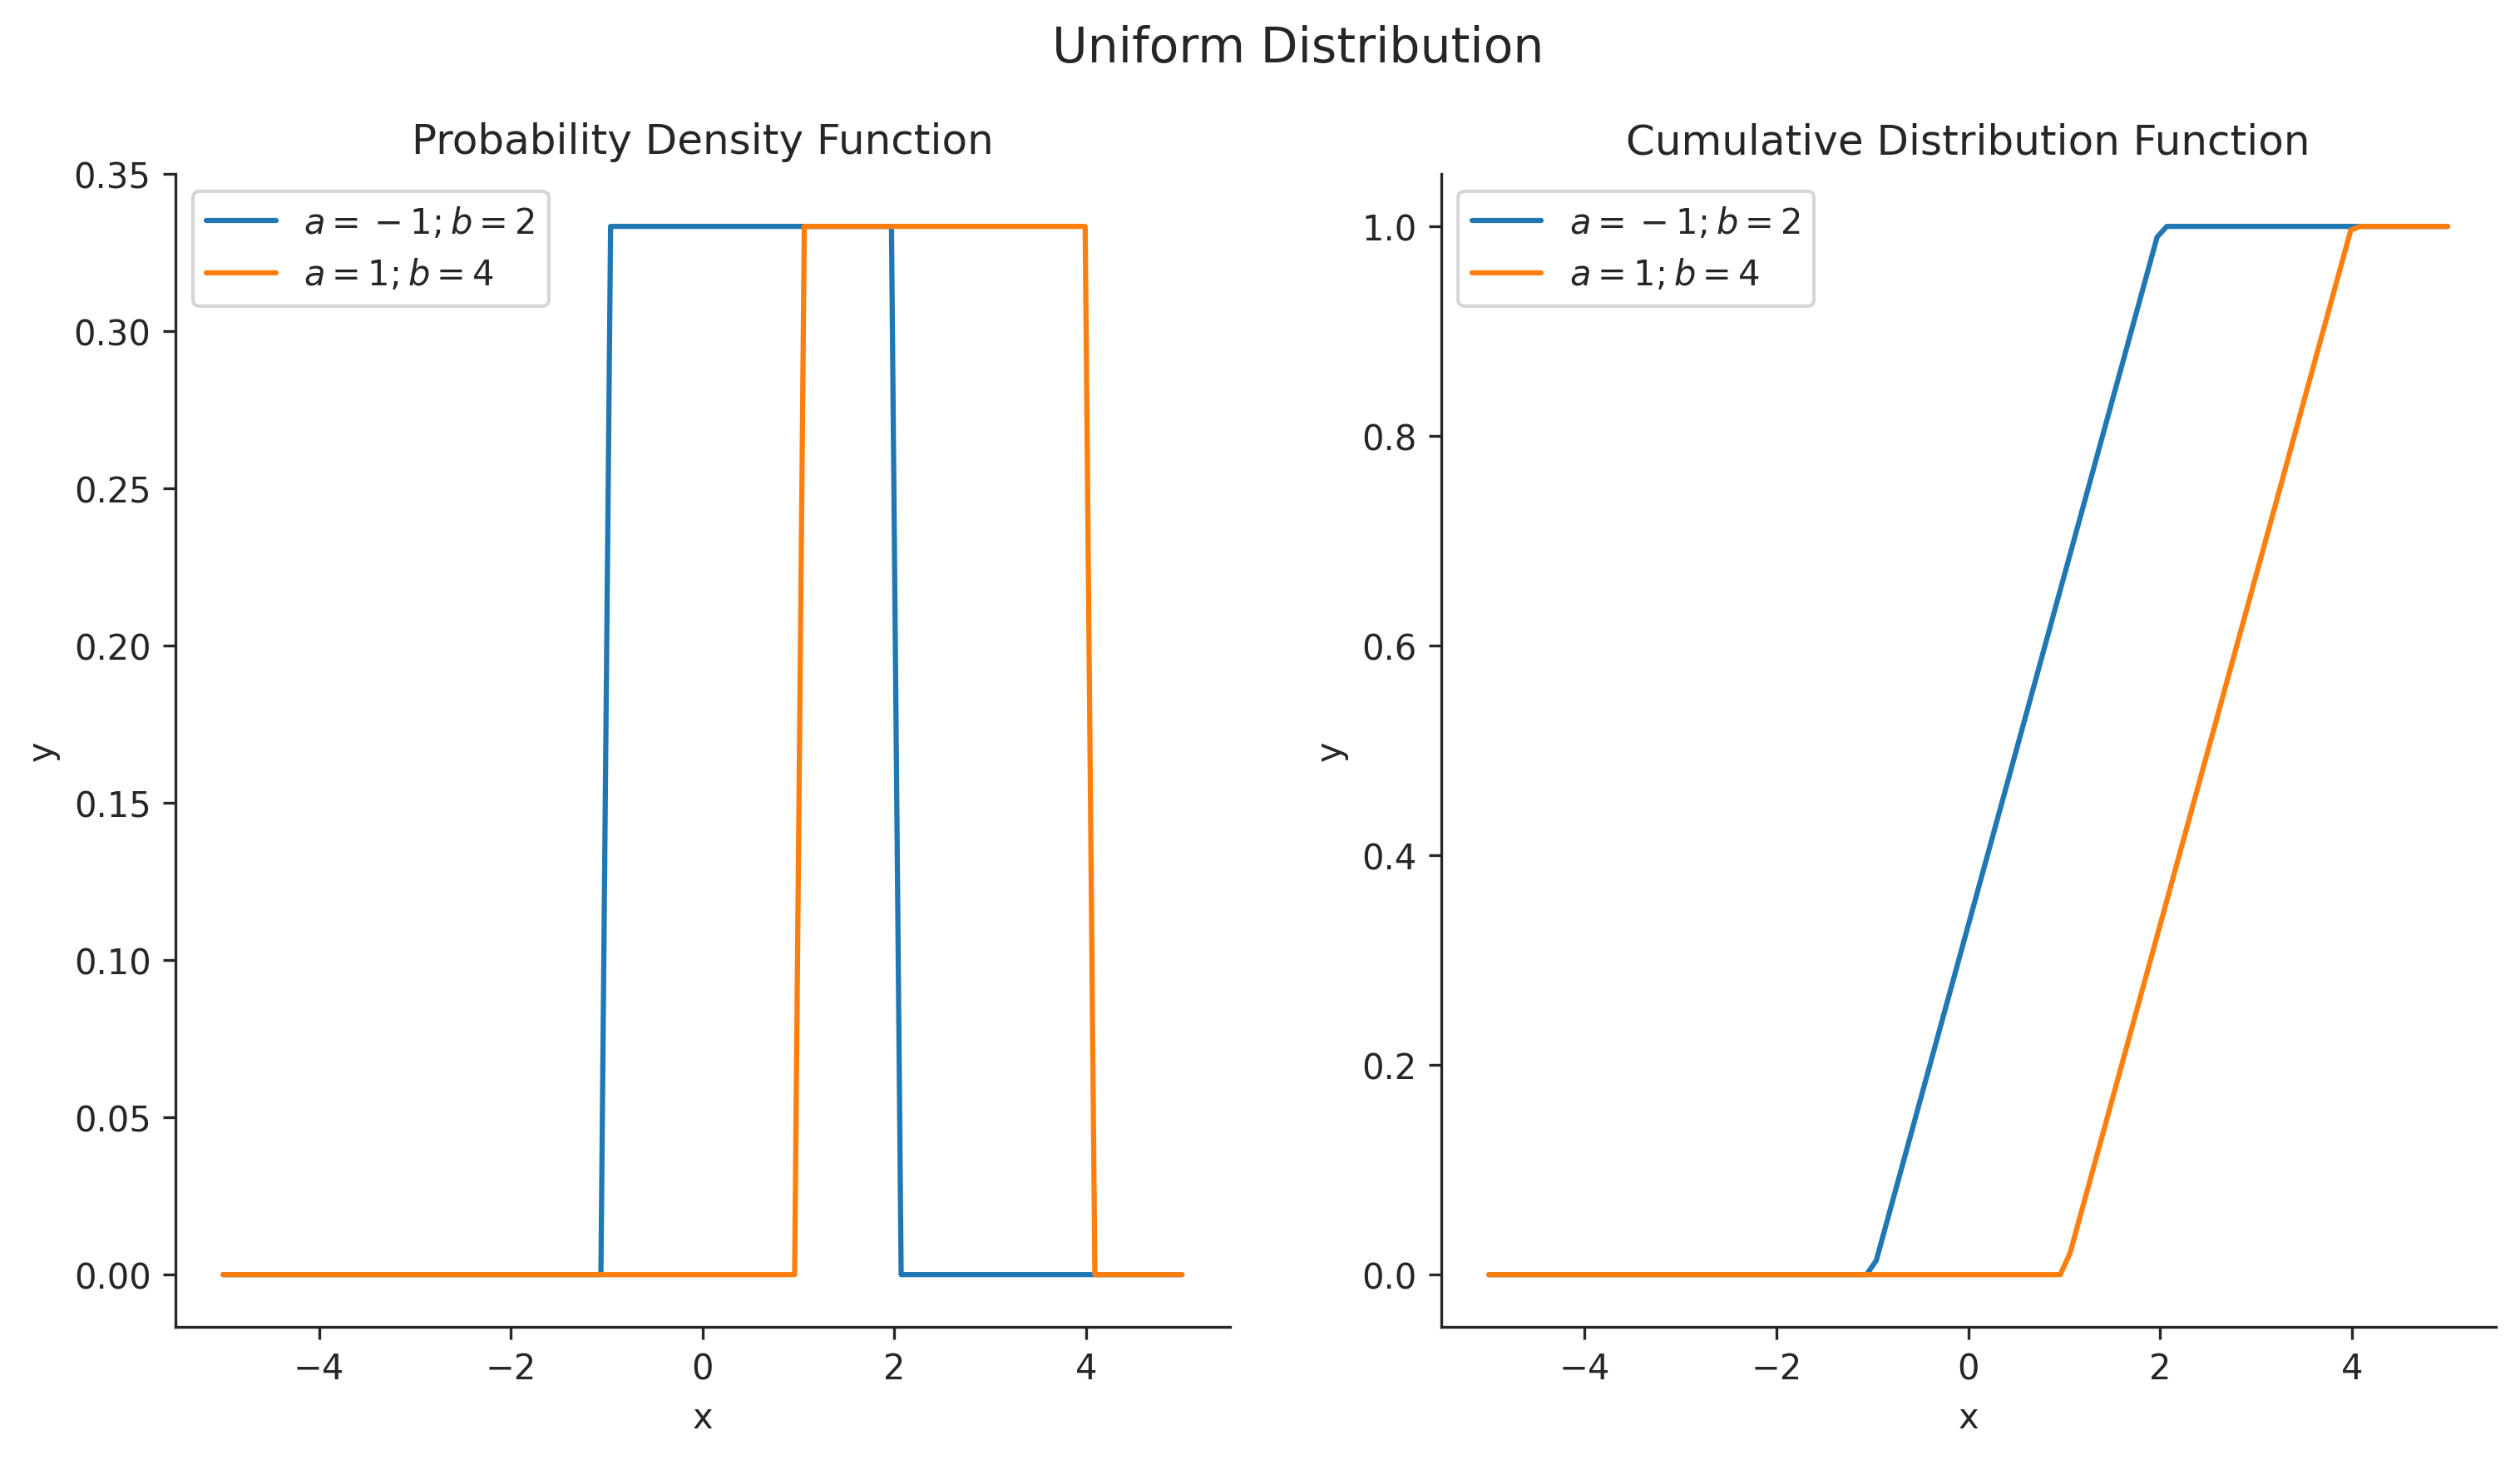

In [6]:
fig, (pdf_ax, cdf_ax) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
fig.suptitle('Uniform Distribution', fontsize=14)
for a, b in ((-N_group, 2 * N_group), (N_group, 4 * N_group)):
    # in SciPy library, uniform distribution is parameterized with parameters loc and scale
    # that allow to compute the probabilities for the interval [loc, loc + scale]
    pdf_ax.plot(x, uniform.pdf(x, a, b - a), label=f'${a=}; {b=}$')
    cdf_ax.plot(x, uniform.cdf(x, a, b - a), label=f'${a=}; {b=}$')

    pdf_ax.set_title('Probability Density Function', fontsize=12)
    cdf_ax.set_title('Cumulative Distribution Function', fontsize=12)

    pdf_ax.set_xlabel('x', fontsize=10)
    pdf_ax.set_ylabel('y', fontsize=10)
    cdf_ax.set_xlabel('x', fontsize=10)
    cdf_ax.set_ylabel('y', fontsize=10)

    pdf_ax.legend()
    cdf_ax.legend()
sns.despine()
plt.show()

### 2.3 Експоненційний розподіл
- $\lambda=\frac{N_{\text{бр}}}{2}$
- $\lambda=N_{\text{бр}}$
- $\lambda=1.5N_{\text{бр}}$

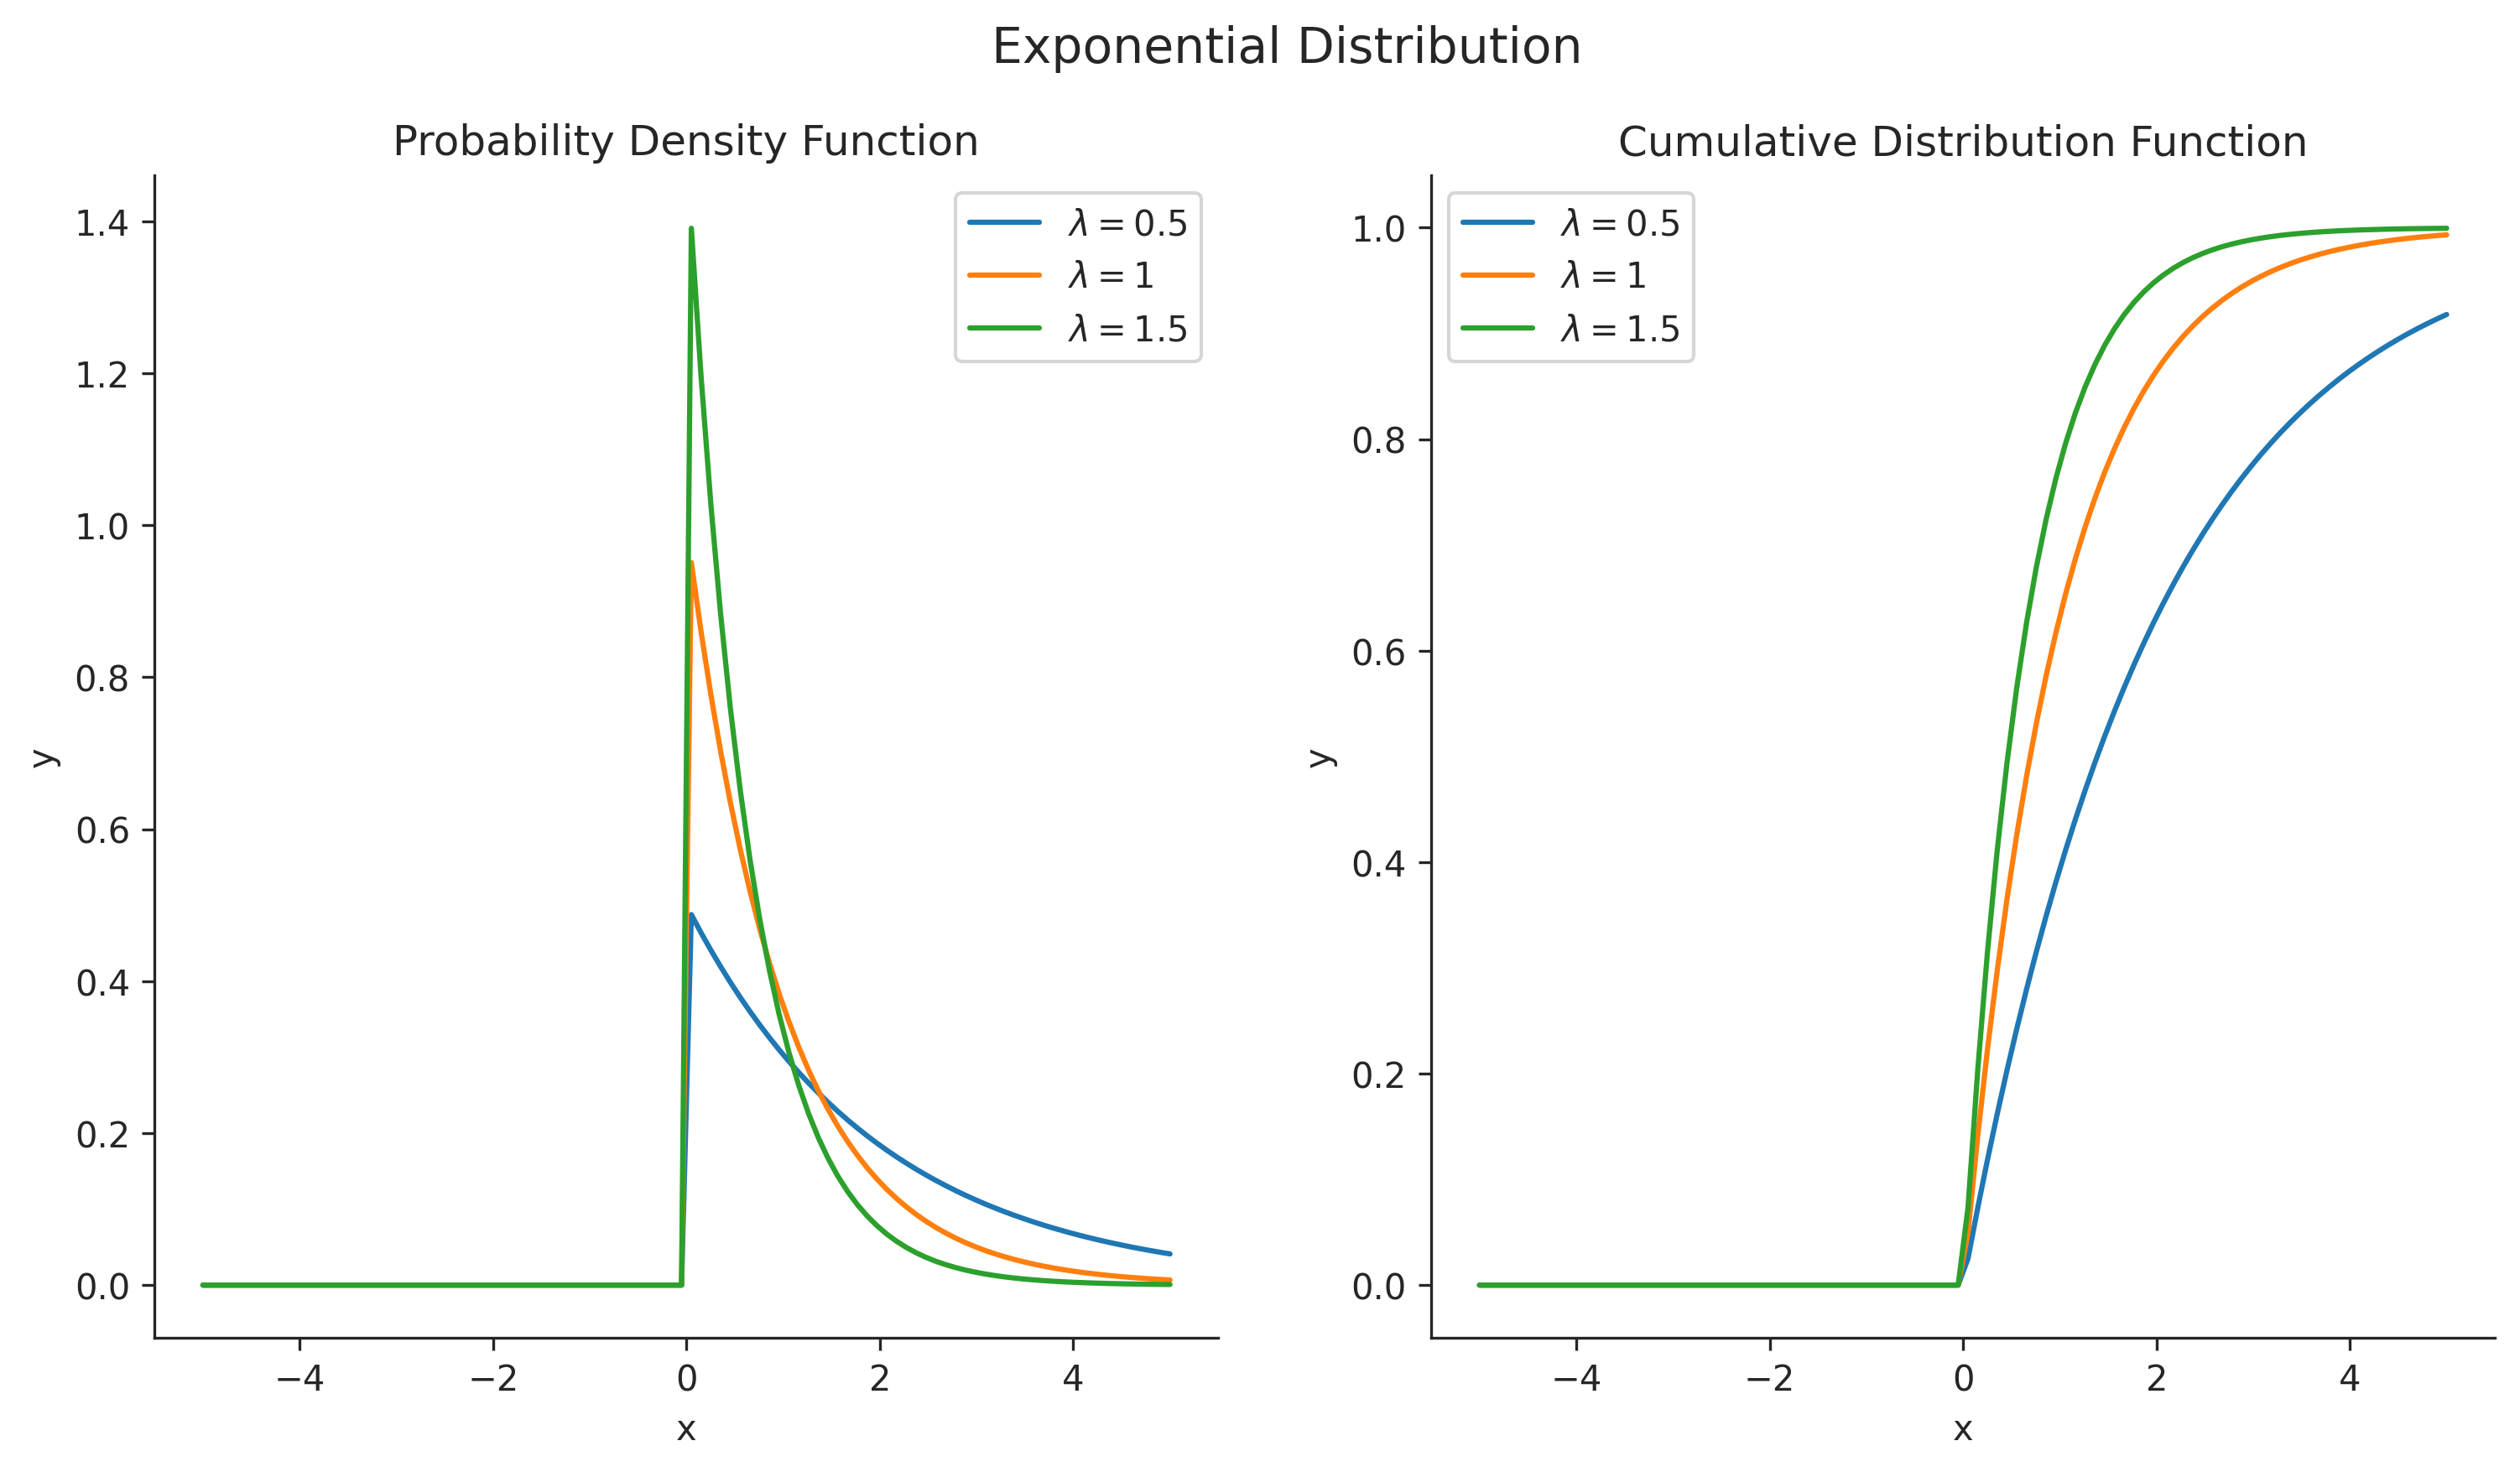

In [7]:
fig, (pdf_ax, cdf_ax) = plt.subplots(1, 2, figsize=(12, 6), dpi=300)
fig.suptitle('Exponential Distribution', fontsize=14)
for lam in (N_group / 2, N_group, 1.5 * N_group):
    # in SciPy library, to parameterize the exponential distribution with parameter lambda
    # we need to set the scale=1 / lambda
    pdf_ax.plot(x, expon.pdf(x, scale=1 / lam), label=f'$\lambda={lam}$')
    cdf_ax.plot(x, expon.cdf(x, scale=1 / lam), label=f'$\lambda={lam}$')

    pdf_ax.set_title('Probability Density Function', fontsize=12)
    cdf_ax.set_title('Cumulative Distribution Function', fontsize=12)

    pdf_ax.set_xlabel('x', fontsize=10)
    pdf_ax.set_ylabel('y', fontsize=10)
    cdf_ax.set_xlabel('x', fontsize=10)
    cdf_ax.set_ylabel('y', fontsize=10)

    pdf_ax.legend()
    cdf_ax.legend()
sns.despine()
plt.show()